In [1]:
import pandas as pd
import numpy as np

In [2]:
players = pd.read_csv('/Users/maxwellpatterson/Desktop/personal/bball/ass-content/data/player_stats_dataworld.csv')

In [3]:
players.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,...,0.2,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997-1998
1,2,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,...,0.7,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997-1998
2,3,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,...,2.8,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997-1998
3,4,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,...,0.3,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1,1997-1998
4,4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,...,0.2,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5,1997-1998


In [14]:
players.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year'],
      dtype='object')

In [28]:
players.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
Year       object
dtype: object

In [15]:
num_unique_players = len(players['Player'].unique())
print(f"Number of unique players: {num_unique_players}")

Number of unique players: 2374


In [16]:
min_year = players['Year'].min()
max_year = players['Year'].max()
print(f"Data spans from {min_year} to {max_year}")

Data spans from 1997-1998 to 2021-2022


In [17]:
missing_values = players.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Rk           0
Player       0
Pos          0
Age          0
Tm           0
G            0
GS           0
MP           0
FG           0
FGA          0
FG%         88
3P           0
3PA          0
3P%       2198
2P           0
2PA          0
2P%        154
eFG%        88
FT           0
FTA          0
FT%        749
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
Year         0
dtype: int64


In [18]:
print("Unique positions:", players['Pos'].unique())
print("Unique teams:", players['Tm'].unique())

Unique positions: ['PG' 'SG' 'SF' 'C' 'PF' 'SG-SF' 'SG-PG' 'PF-C' 'SF-SG' 'SF-PF' 'PF-SF'
 'C-PF' 'PG-SG' 'PG-SF' 'SG-PF' 'SF-C']
Unique teams: ['SAC' 'VAN' 'TOT' 'SAS' 'DEN' 'MIL' 'CLE' 'ATL' 'POR' 'BOS' 'ORL' 'UTA'
 'DAL' 'SEA' 'GSW' 'CHH' 'MIA' 'LAC' 'PHI' 'LAL' 'NJN' 'IND' 'TOR' 'CHI'
 'NYK' 'PHO' 'HOU' 'MIN' 'WAS' 'DET' 'MEM' 'NOH' 'CHA' 'NOK' 'OKC' 'BRK'
 'NOP' 'CHO']


In [19]:
# Replace empty strings with NaN
players = players.replace(r'^\s*$', np.nan, regex=True)

# Remove rows with missing values
players = players.dropna()

In [27]:
players.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
Year       object
dtype: object

In [23]:
features = ['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

In [29]:
# Specify the columns to convert from float to int
float_to_int_columns = ['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

# Convert float columns to int
for col in float_to_int_columns:
    players[col] = players[col].astype(int)

In [31]:
players = players.dropna()

In [35]:
players.shape

(11962, 31)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(players[features])

In [37]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

In [38]:
players['Cluster'] = kmeans.labels_

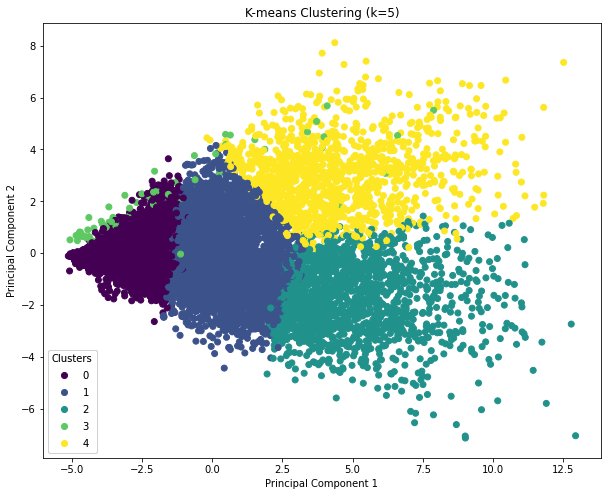

In [39]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')

# Add labels and legend
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering (k=5)')

# Create legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
plt.gca().add_artist(legend1)

plt.show()